Visualizations
- Category by purchase amount (insight into high-purchase categories to prioritize product inventory)
- Category by purchase amount by location - inform what promotions to run

In [4]:
# Import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import scipy 

In [5]:
# Load the data 
df = pd.read_csv("../data/Customers3.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Loading the data and reviewing data types, columns, and first few rows 

In [6]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

The purpose of the first visualization is to identify the high-selling categories and to understand which categories exist.

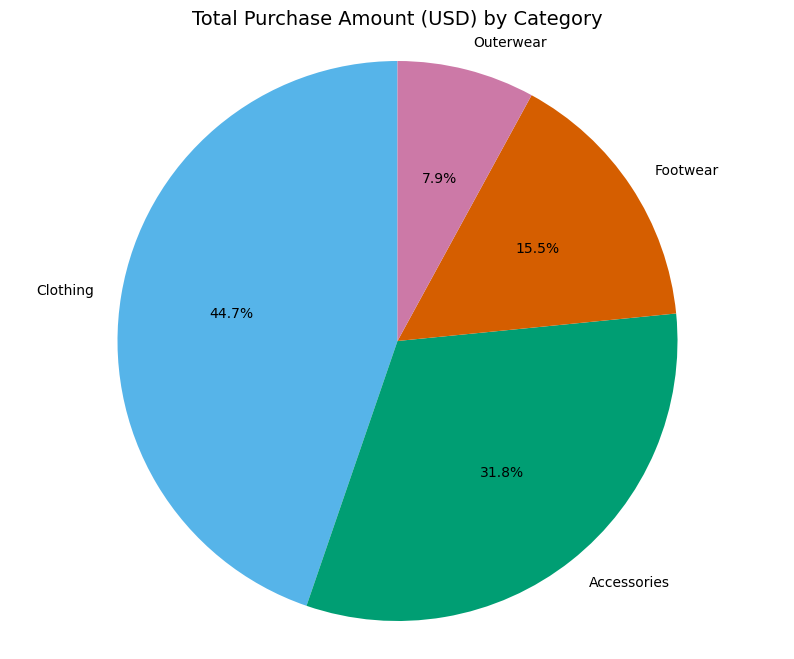

In [7]:
# Plotting category by purchase amount (insight into high-purchase categories to prioritize product inventory)

# Summing the purchase amounts by category
category_totals = (
    df.groupby("Category")["Purchase Amount (USD)"]
    .sum()
    .sort_values(ascending=False)
)
#print(category_totals) 
# I want to see the categories ranked in descending order based on their total sales across the entire dataset.

# Colours for accessibility 
colorblind_palette = [
    "#56B4E9",  # sky blue
    "#009E73",  # bluish green
    "#D55E00",  # vermilion
    "#CC79A7",  # reddish purple
]

# Creating a pie chart for clear distinction of most purchased category
plt.figure(figsize=(10, 8))
plt.pie(
    category_totals,
    labels = category_totals.index, # to display each category name
    colors=colorblind_palette,
    autopct = '%1.1f%%',            # to display the percentages of each category
    startangle=90                  # to display the graph in a favourable way
)

# Titles and legend 
plt.title("Total Purchase Amount (USD) by Category", fontsize = 14)
plt.axis('equal')                   # to center the visualzation 

plt.show()




In [8]:
# Filter for Clothing Category
clothing_df = df[df["Category"] == "Clothing"]

# How many times each unique clothing item was sold 
clothing_item_volume = clothing_df["Item Purchased"].value_counts()

print("Sales volume for each clothing item")
for item, count in clothing_item_volume.items():
    print(f"{item}: {count}")

Sales volume for each clothing item
Blouse: 171
Pants: 171
Shirt: 169
Dress: 166
Sweater: 164
Socks: 159
Skirt: 158
Shorts: 157
Hoodie: 151
T-shirt: 147
Jeans: 124


In [12]:
# Find top 10 locations by total purchase amount
top_locations = (
    df.groupby("Location")["Purchase Amount (USD)"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_locations)


Location
Montana          5784
Illinois         5617
California       5605
Idaho            5587
Nevada           5514
Alabama          5261
New York         5257
North Dakota     5220
West Virginia    5174
Nebraska         5172
Name: Purchase Amount (USD), dtype: int64


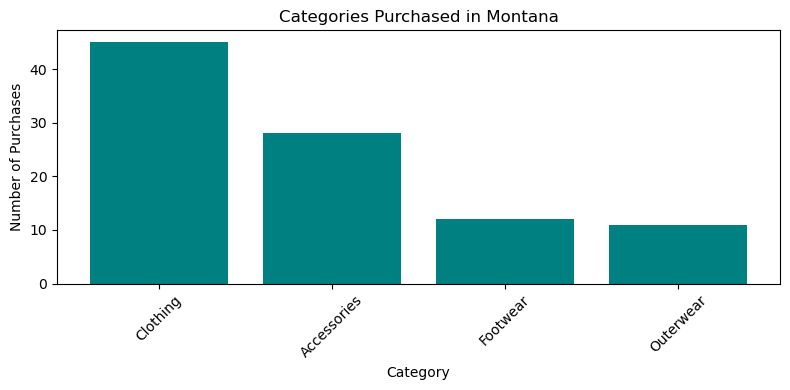

In [10]:
# Filter for Montana
montana_df = df[df["Location"] == "Montana"]

# Count how many purchases were made in each category
category_counts = montana_df["Category"].value_counts()

# Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(category_counts.index, category_counts.values, color='teal')

ax.set_title("Categories Purchased in Montana")
ax.set_xlabel("Category")
ax.set_ylabel("Number of Purchases")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

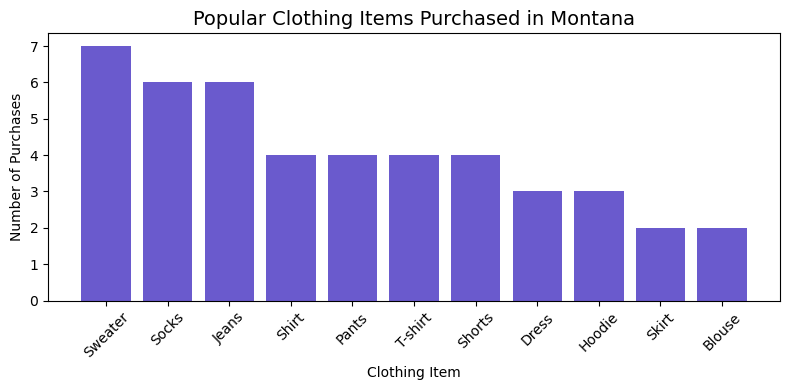

In [11]:
# Filter for Montana + Clothing category
mt_clothing = df[(df["Location"] == "Montana") & (df["Category"] == "Clothing")]

# Count each unique clothing item purchased
item_counts = mt_clothing["Item Purchased"].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(item_counts.index, item_counts.values, color='slateblue')

# Customize labels and title
ax.set_title("Popular Clothing Items Purchased in Montana", fontsize=14)
ax.set_xlabel("Clothing Item")
ax.set_ylabel("Number of Purchases")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()